In [1]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

RecipeRLG=pd.read_csv('full_dataset.csv')

# Display the DataFrame
recipe_dummy_df=RecipeRLG

In [2]:
recipe_dummy_df.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [3]:
# Basic statistics of numerical columns
recipe_dummy_df.describe()

,Unnamed: 0
count,2.231142e+06
mean,1.115570e+06
std,6.440754e+05
min,0.000000e+00
25%,5.577852e+05
50%,1.115570e+06
75%,1.673356e+06
max,2.231141e+06


In [4]:
# # Distribution of ratings
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 6))
# plt.hist(recipe_dummy_df['ratings'], bins=5, edgecolor='black')
# plt.title('Distribution of Ratings')
# plt.xlabel('Ratings')
# plt.ylabel('Frequency')
# plt.show()

In [5]:
# Count of unique ingredients and directions
unique_ingredients = recipe_dummy_df['ingredients'].apply(lambda x: len(set(x.split('", "')))).sum()
unique_directions = recipe_dummy_df['directions'].apply(lambda x: len(set(x.split('", "')))).sum()

unique_ingredients, unique_directions

(23281941, 25195200)

In [6]:
from collections import Counter

# Ingredient Frequency
all_ingredients = [ingredient for sublist in recipe_dummy_df['ingredients'].apply(lambda x: x.split('", "')).tolist() for ingredient in sublist]
ingredient_count = Counter(all_ingredients)

ingredient_count

Counter({'["1 c. firmly packed brown sugar"': 88,
         '"1/2 c. evaporated milk"': 1488,
         '"1/2 tsp. vanilla"': 8831,
         '"1/2 c. broken nuts (pecans)"': 2,
         '"2 Tbsp. butter or margarine"': 2758,
         '"3 1/2 c. bite size shredded rice biscuits"]': 1,
         '["1 small jar chipped beef': 2,
         'cut up"': 13451,
         '"4 boned chicken breasts"': 13,
         '"1 can cream of mushroom soup"': 19727,
         '"1 carton sour cream"]': 90,
         '["2 (16 oz.) pkg. frozen corn"': 4,
         '"1 (8 oz.) pkg. cream cheese': 3375,
         'cubed"': 26354,
         '"1/3 c. butter': 700,
         '"1/2 tsp. garlic powder"': 4103,
         '"1/2 tsp. salt"': 73998,
         '"1/4 tsp. pepper"]': 3545,
         '["1 large whole chicken"': 15,
         '"2 (10 1/2 oz.) cans chicken gravy"': 2,
         '"1 (10 1/2 oz.) can cream of mushroom soup"': 331,
         '"1 (6 oz.) box Stove Top stuffing"': 4,
         '"4 oz. shredded cheese"]': 12,
       

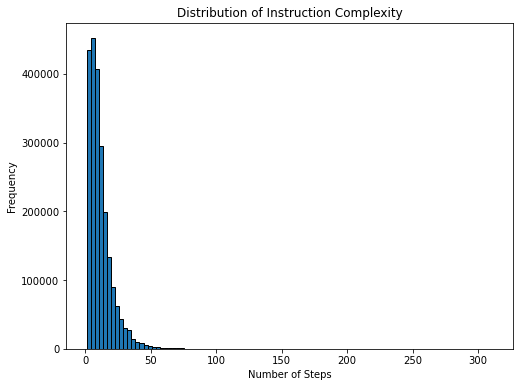

In [9]:
import matplotlib.pyplot as plt
# Instruction Complexity
instruction_complexity = recipe_dummy_df['directions'].apply(lambda x: len(x.split(',')))

# Plotting the distribution of instruction complexity
plt.figure(figsize=(8, 6))
plt.hist(instruction_complexity, bins=100, edgecolor='black')
plt.title('Distribution of Instruction Complexity')
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.show()

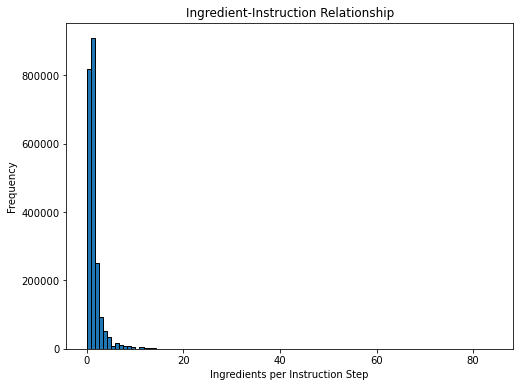

In [10]:
# Ingredient-Instruction Relationship

# Count of unique ingredients per instruction step
ingredient_instruction_relation = recipe_dummy_df.apply(lambda x: len(set(x['ingredients'].split(','))) / len(set(x['directions'].split('", "'))), axis=1)

# Plotting the relationship
plt.figure(figsize=(8, 6))
plt.hist(ingredient_instruction_relation, bins=100, edgecolor='black')
plt.title('Ingredient-Instruction Relationship')
plt.xlabel('Ingredients per Instruction Step')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Display the first few rows of the dummy dataset
recipe_dummy_df.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


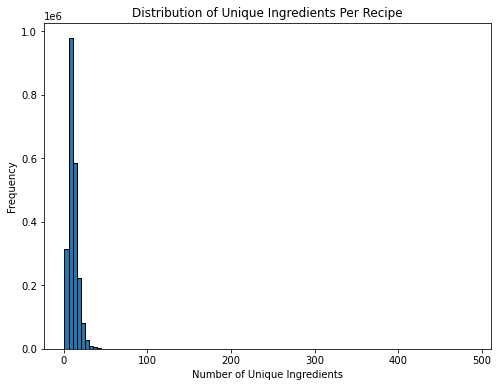

In [12]:
# Count of unique ingredients per recipe
ingredients_per_recipe = recipe_dummy_df['ingredients'].apply(lambda x: len(x.split('", "')))

# Plotting the distribution of unique ingredients per recipe
plt.figure(figsize=(8, 6))
plt.hist(ingredients_per_recipe, bins=100, edgecolor='black')
plt.title('Distribution of Unique Ingredients Per Recipe')
plt.xlabel('Number of Unique Ingredients')
plt.ylabel('Frequency')
plt.show()

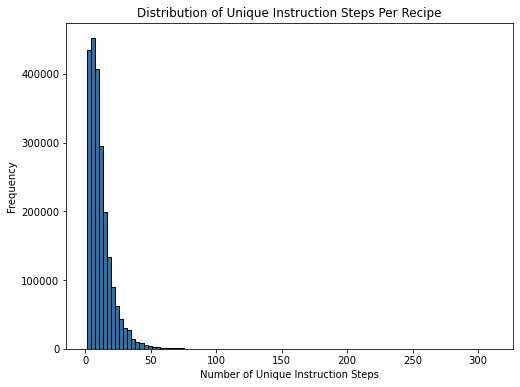

In [13]:
# Count of unique instruction steps per recipe
directions_per_recipe = recipe_dummy_df['directions'].apply(lambda x: len(x.split('", "')))

# Plotting the distribution of unique instruction steps per recipe
plt.figure(figsize=(8, 6))
plt.hist(directions_per_recipe, bins=100, edgecolor='black')
plt.title('Distribution of Unique Instruction Steps Per Recipe')
plt.xlabel('Number of Unique Instruction Steps')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Extract ingredients for recipes containing 'Pizza' in the title
pizza_ingredients = recipe_dummy_df[recipe_dummy_df['title'].str.contains('Pizza', case=False)]['ingredients'].apply(lambda x: x.split('", "')).tolist()

# Flatten the list of lists to a single list
all_pizza_ingredients = [ingredient for sublist in pizza_ingredients for ingredient in sublist]

# Count the occurrences of each ingredient in Pizza recipes
common_pizza_ingredients = Counter(all_pizza_ingredients)

common_pizza_ingredients



Counter({'["2 cans cherry pie mix': 1,
         '1 box deluxe white cake mix': 1,
         '1 stick butter': 20,
         '1 c. ground nuts"]': 1,
         '["1 box yellow cake mix': 18,
         '1/4 c. water': 103,
         '1/4 c. brown sugar': 47,
         '1/2 c. soft butter': 3,
         '2 eggs': 452,
         '1/2 c. chopped nuts"]': 5,
         '["1 lb. ground beef': 415,
         '14 oz. Pizza Quick sauce': 1,
         '2 c. shredded Mozzarella cheese': 88,
         '1 jar sliced mushrooms': 9,
         '3/4 c. biscuit mix': 16,
         '1 1/2 c. milk': 66,
         '2 eggs"]': 65,
         '["1 tube cookie dough': 1,
         '1 pkg. cream cheese': 26,
         '1/3 c. Marshmallow Fluff': 1,
         'sliced blueberries, peaches, kiwi and strawberries"]': 1,
         '["1 tube refrigerator enriched sugar cookie dough': 1,
         '8 oz. cream cheese, softened': 67,
         'assorted canned or fresh fruits, sliced': 1,
         '1/2 c. powdered sugar': 86,
         'coconu

In [18]:
# Sort by count in ascending order
sorted_by_count = dict(sorted(common_pizza_ingredients.items(), key=lambda item: item[1]))

# Or, to sort by count in descending order
sorted_by_count_reverse = dict(sorted(common_pizza_ingredients.items(), key=lambda item: item[1], reverse=True))
sorted_by_count_reverse

{'1 teaspoon salt': 857,
 '2 tablespoons olive oil': 659,
 '1 tablespoon olive oil': 640,
 '1/2 tsp. salt': 616,
 '1/2 teaspoon salt': 591,
 '1 egg': 556,
 '1 tsp. salt': 524,
 '2 eggs': 452,
 '["1 lb. ground beef': 415,
 '1 teaspoon sugar': 415,
 '1 tsp. oregano': 392,
 '1/4 teaspoon salt': 378,
 '8 oz. cream cheese': 312,
 '1 (8 oz.) pkg. cream cheese': 301,
 '1/2 tsp. oregano': 288,
 '["2 pkg. crescent rolls': 276,
 '1 teaspoon dried oregano': 262,
 '2 (8 oz.) pkg. cream cheese': 261,
 '2 garlic cloves, minced': 258,
 '1 medium onion, chopped': 257,
 'salt': 257,
 '1/4 c. milk': 242,
 '1/2 c. sugar': 242,
 '1 tsp. vanilla': 238,
 '1 c. mayonnaise': 235,
 '1/8 tsp. pepper': 232,
 '1 tablespoon sugar': 217,
 'salt and pepper': 212,
 '1/2 tsp. vanilla': 205,
 '1 garlic clove, minced': 205,
 '1/4 tsp. pepper': 202,
 '1/2 c. chopped onion': 197,
 '1 small onion, chopped': 194,
 '1/4 tsp. salt': 193,
 '5 eggs': 193,
 '1/3 c. sugar': 190,
 '1 onion, chopped': 190,
 '1 lb. ground beef': 189

In [19]:
# Extract instruction steps for recipes containing 'Pizza' in the title
pizza_directions = recipe_dummy_df[recipe_dummy_df['title'].str.contains('Pizza', case=False)]['directions'].apply(lambda x: x.split('", "')).tolist()

# Flatten the list of lists to a single list
all_pizza_directions = [instruction for sublist in pizza_directions for instruction in sublist]

# Count the occurrences of each instruction step in Pizza recipes
common_pizza_directions = Counter(all_pizza_directions)

common_pizza_directions

Counter({'["Grease a 9 x 12-inch cake pan.': 1,
         'Spread cherry pie mix.': 1,
         'Sift cake mix and spread it dry over the cherries.': 1,
         'Top with ground nuts.': 1,
         'Melt butter and pour over top.': 1,
         'Bake 45 minutes in a 350\\u00b0 oven."]': 1,
         '["Mix ingredients and spread into 2 greased pizza pans.': 1,
         'Bake at 350\\u00b0 for 15-20 minutes."]': 1,
         '["Brown beef; stir to crumble.': 1,
         'Drain.': 214,
         'Put beef into 8-inch baking dish.': 1,
         'Top with sauce, Mozzarella cheese and sliced mushrooms.': 1,
         'Combine the biscuit mix, milk and eggs; beat until smooth, then evenly pour over casserole.': 1,
         'Bake at 400\\u00b0 for 30 to 35 minutes."]': 15,
         '["Prepare cookie dough in circular baking pan.': 1,
         'Bake according to directions; cool."]': 1,
         '["Press out cookie dough flat on a 13-inch pizza pan or cookie sheet.': 1,
         'Bake according to 

In [27]:
# Sort by count in ascending order
sorted_by_count = dict(sorted(common_pizza_directions.items(), key=lambda item: item[1]))

# Or, to sort by count in descending order
sorted_by_count_reverse = dict(sorted(common_pizza_directions.items(), key=lambda item: item[1], reverse=True))
sorted_by_count_reverse

{'': 1515,
 'Set aside.': 441,
 'Cool.': 390,
 'Enjoy!"]': 285,
 '2.': 247,
 '3.': 245,
 'Drain.': 214,
 '4.': 213,
 '["1.': 200,
 'Cool."]': 180,
 'Sprinkle with cheese.': 175,
 'Let cool.': 174,
 '["Preheat oven to 350\\u00b0.': 172,
 '5.': 171,
 'Mix well.': 162,
 'Top with cheese.': 153,
 '["Preheat oven to 450\\u00b0.': 150,
 'Season with salt and pepper.': 149,
 'Serve immediately."]': 139,
 'Remove from oven.': 132,
 '["Preheat oven to 375\\u00b0.': 123,
 'Cool completely.': 120,
 '6.': 119,
 '["Preheat oven to 400\\u00b0.': 118,
 '["Preheat oven to 350 degrees.': 110,
 'Remove from heat.': 109,
 '["Heat oven to 350\\u00b0.': 107,
 '["Preheat oven to 400 degrees.': 102,
 'Sprinkle with Parmesan cheese.': 100,
 '["Preheat oven to 425\\u00b0.': 98,
 ').': 95,
 'Bake 10 min.': 90,
 '7.': 89,
 'Serve warm."]': 88,
 '["Heat oven to 400 degrees F.': 86,
 'Top with remaining ingredients.': 83,
 '["Heat oven to 450 degrees F.': 83,
 '["Heat oven to 425 degrees F.': 76,
 'Spread over cru

In [ ]:
# Sort by count in ascending order
sorted_by_count = dict(sorted(common_pizza_ingredients.items(), key=lambda item: item[1]))

# Or, to sort by count in descending order
sorted_by_count_reverse = dict(sorted(common_pizza_ingredients.items(), key=lambda item: item[1], reverse=True))
sorted_by_count_reverse

In [21]:
# Modifying the dummy data to represent ingredients and directions as arrays (lists in Python)
recipe_dummy_df['ingredients'] = recipe_dummy_df['ingredients'].apply(lambda x: x.split('", "'))
recipe_dummy_df['directions'] = recipe_dummy_df['directions'].apply(lambda x: x.split('", "'))

# Display the first few rows of the modified dummy dataset
recipe_dummy_df.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[[""1 c. firmly packed brown sugar, 1/2 c. evap...","[[""In a heavy 2-quart saucepan, mix brown suga...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[[""1 small jar chipped beef, cut up, 4 boned c...","[[""Place chipped beef on bottom of baking dish...",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[[""2 (16 oz.) pkg. frozen corn, 1 (8 oz.) pkg....","[[""In a slow cooker, combine all ingredients. ...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[[""1 large whole chicken, 2 (10 1/2 oz.) cans ...","[[""Boil and debone chicken., Put bite size pie...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[[""1 c. peanut butter, 3/4 c. graham cracker c...","[[""Combine first four ingredients and press in...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [25]:
# Importing necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# 1. Ingredient-Based Recommendations
# -------------------------------------
# Flatten the list of lists to a single list containing all ingredients
all_ingredients = [ingredient for sublist in recipe_dummy_df['ingredients'] for ingredient in sublist]
# Count the occurrences of each ingredient
common_ingredients = Counter(all_ingredients)


In [29]:
recipe_dummy_df['ingredients'][0]

['["1 c. firmly packed brown sugar',
 '1/2 c. evaporated milk',
 '1/2 tsp. vanilla',
 '1/2 c. broken nuts (pecans)',
 '2 Tbsp. butter or margarine',
 '3 1/2 c. bite size shredded rice biscuits"]']

In [31]:

# 2. Complexity-Based Recommendations
# -------------------------------------
# Count the number of unique ingredients and directions for each recipe
recipe_dummy_df['num_ingredients'] = recipe_dummy_df['ingredients'].apply(lambda x: len(set(x)))
recipe_dummy_df['num_directions'] = recipe_dummy_df['directions'].apply(lambda x: len(set(x)))
# Categorize recipes as 'Simple'", "'Moderate', or 'Complex' based on the number of unique ingredients and directions
recipe_dummy_df['complexity'] = np.where(((recipe_dummy_df['num_ingredients'] <= 2) & (recipe_dummy_df['num_directions'] <= 2)), 'Simple','Complex')


SyntaxError: invalid syntax (1312909450.py, line 7)

In [34]:
# 3. Text-Based Recommendations
# -------------------------------------
# Use TF-IDF Vectorizer to transform the recipe titles into a matrix of TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(recipe_dummy_df['title'])
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Display the first few rows of the modified dummy dataset
recipe_dummy_df.head()

: 

In [ ]:
# Display the results for each type of recommendation

# 1. Ingredient-Based Recommendations
# -------------------------------------
# Display the 5 most common ingredients
common_ingredients.most_common(5)

# 2. Complexity-Based Recommendations
# -------------------------------------
# Display the distribution of 'complexity' across recipes
recipe_dummy_df['complexity'].value_counts()

# 3. Text-Based Recommendations
# -------------------------------------
# Display the first few rows of the cosine similarity matrix
cosine_sim[:5, :5]